# Project: Life Expectancy Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I decided to investigate Gapminder World data in order to see if there is a correlation overtime to life expectancies.  There were a number of different variables I could have chosen from but decided to go with: child mortality, co2 emissions, human development, democracy score, and income per person.  With these, I hope to find which one may have the closest correlation to life expectancy over the years.  

>  The original data was broken out by country and even though I could investigate life expectancy at a country level, I decided to take the average of all the countries to find the global average life expectancy by year.  I also went ahead and applied the average of all the countries for all the variables.  This helped me start with data that was more clean and could be analyzed at a macro level. 

In [140]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I take a closer look at the data to review the years and variables available for each.  This will help me narrow down the data to be as clean as possible.

### General Properties

In [142]:
# reviewing datasets by loading with pandas
life_expectancy = pd.read_csv('Data/life_expectancy_years.csv')
income_per_person = pd.read_csv('Data/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
human_development_index = pd.read_csv('Data/hdi_human_development_index.csv')
democracy_score = pd.read_csv('Data/democracy_score_use_as_color.csv')
corruption_preception_index = pd.read_csv('Data/corruption_perception_index_cpi.csv')
co2_emissions = pd.read_csv('Data/co2_emissions_tonnes_per_person.csv')
child_mortality = pd.read_csv('Data/child_mortality_0_5_year_olds_dying_per_1000_born.csv')

### Reformatting Life Expectancy Dataframe

In [143]:
# initial review
life_expectancy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,55.7,56.2,56.7,57.2,57.7,57.8,57.9,58.0,58.4,58.7
1,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,75.9,76.3,76.7,77.0,77.2,77.4,77.6,77.7,77.9,78.0
2,Algeria,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,28.8,...,76.3,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.6,77.9
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.7,82.7,82.6,82.6,82.6,82.6,82.5,82.5,NaN,NaN
4,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,59.3,60.1,60.9,61.7,62.5,63.3,64.0,64.7,64.9,65.2


In [144]:
# removing country
life_expectancy.drop(columns=['country'], inplace=True)

In [145]:
# transposing the data so year can be the new index
life_expectancy = life_expectancy.transpose()

In [146]:
life_expectancy.head()

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
1800,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1801,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,37.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1802,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,38.6,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1803,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,37.3,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7
1804,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,41.4,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7


In [147]:
# creating a new column that takes the average life expectancy across all countries
life_expectancy['life_expectancy'] = life_expectancy.mean(numeric_only=True, axis=1)

In [148]:
life_expectancy.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,life_expectancy
1800,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7,31.502717
1801,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7,31.461957
1802,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7,31.478804
1803,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7,31.383152
1804,28.2,35.4,28.8,NaN,27.0,33.5,33.2,34.0,34.0,34.4,...,39.4,32.9,26.9,24.3,32.2,32.0,23.4,32.6,33.7,31.459239


In [149]:
# removing all other rows except life_expectancy
life_expectancy = life_expectancy.loc[:, life_expectancy.columns.intersection(['life_expectancy'])]

In [150]:
life_expectancy.head()

,life_expectancy
1800,31.502717
1801,31.461957
1802,31.478804
1803,31.383152
1804,31.459239


In [151]:
# reviewing data to see statistical relevance of data
life_expectancy.describe()

,life_expectancy
count,219.000000
mean,43.051129
std,14.444069
min,22.956250
25%,31.755163
50%,34.425000
75%,57.191576
max,72.658152


For life expectancy, we see the minimum life expectancy as 22 and maximum at 72.  With 50% being at 34 and the mean being 43, we can see there is not much skewness in the data. 

### Reformatting Income Per Person Dataframe

Gross domestic product per person adjusted for differences in purchasing power (in international dollars, fixed 2011 prices)

In [153]:
# initial review
income_per_person.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [154]:
# removing country column
income_per_person.drop(columns=['country'], inplace=True)

In [155]:
# transposing so year is the new index
income_per_person = income_per_person.transpose()

In [156]:
# creating a new column for the average income per person across all countries
income_per_person['income_per_person'] = income_per_person.mean(numeric_only=True, axis=1)

In [157]:
# removing all other columns and only setting the income_per_person column
income_per_person = income_per_person.loc[:, income_per_person.columns.intersection(['income_per_person'])]

In [159]:
# reviewing statistical relevance of data
income_per_person.describe()

,income_per_person
count,241.000000
mean,6392.946467
std,7307.288020
min,947.782383
25%,1268.062176
50%,2142.362694
75%,11709.051813
max,29039.730570


For income per person, we see a min of 947 and max of 29039.  50% of people have an income of 2142 whil the top 75% has an income of 11709.  This is a very large range meaning there are more people who are on the lower end of income. 

### Reformatting Human Development Index Dataframe

In [160]:
# initial review
human_development_index.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [161]:
# dropping country column
human_development_index.drop(columns=['country'], inplace=True)

In [162]:
# transposing data so year is the new index
human_development_index = human_development_index.transpose()

In [163]:
# creating a new column that takes the average human development index
human_development_index['hdi'] = human_development_index.mean(numeric_only=True, axis=1)

In [164]:
# removing all other columns and only saving the hdi column
human_development_index = human_development_index.loc[:, human_development_index.columns.intersection(['hdi'])]

In [165]:
# reviewing statistical relevance
human_development_index.describe()

,hdi
count,26.000000
mean,0.643193
std,0.034266
min,0.592552
25%,0.615274
50%,0.640426
75%,0.672659
max,0.697695


For human development, the min is 0.5 while the max is 0.6.  The data is very close to each other and this may be due to the limited amount of data available on human development.  I will review further the available years to see the distribution. 

### Reformatting Democracy Score Dataframe

In [166]:
# initial review
democracy_score.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Afghanistan,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,7.0,7.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.0,-3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
4,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0


In [167]:
# dropping country column
democracy_score.drop(columns=['country'], inplace=True)

In [168]:
# transposing data so year is the new index
democracy_score = democracy_score.transpose()

In [169]:
# creating a new column that takes the average across all country's democracy score
democracy_score['democracy_score'] = democracy_score.mean(numeric_only=True, axis=1)

In [170]:
# removing all other columns except democracy_score
democracy_score = democracy_score.loc[:, democracy_score.columns.intersection(['democracy_score'])]

In [171]:
# reviewing statistical relevance
democracy_score.describe()

,democracy_score
count,212.000000
mean,-2.153932
std,2.799962
min,-7.555556
25%,-3.518336
50%,-1.937742
75%,-0.955000
max,4.155844


The data is very interesting here.  The min for democracy score is -7 while the max is 4.  The mean is -2 meaning majority of countries have a negative democracy score.  It will be interesting to see what impact this may have on life expectancy

### Reformatting Corruption Prediction Index Dataframe

Transaprency International's score of perceptions of corruption. Higher values indicated less corruption

In [172]:
# removing country column
corruption_preception_index.drop(columns=['country'], inplace=True)

In [173]:
# transposing data so year is the new index
corruption_preception_index = corruption_preception_index.transpose()

In [174]:
# creating a new column for average corruption preception index across all countries
corruption_preception_index['cpi'] = corruption_preception_index.mean(numeric_only=True, axis=1)

In [175]:
# removing all other columns except cpi
corruption_preception_index = corruption_preception_index.loc[:, corruption_preception_index.columns.intersection(['cpi'])]

In [44]:
corruption_preception_index.describe()

,cpi
count,6.000000
mean,42.660229
std,0.275529
min,42.306358
25%,42.426511
50%,42.739411
75%,42.877973
max,42.929825


The min and max of this data set are similar meaning, there may not be much data available for corruption preception and I will investigate futher the available years for cpi. 

### Reformatting CO2 Emissions Dataframe

Carbon dioxide emissions from the burning of fossil fuel (metric tonnes of CO2 per person).

In [176]:
# removing country column
co2_emissions.drop(columns=['country'], inplace=True)

In [177]:
# transposing data so year is the year index
co2_emissions = co2_emissions.transpose()

In [178]:
# creating a new column that takes the average co2 emissions across all countries
co2_emissions['co2_emissions'] = co2_emissions.mean(numeric_only=True, axis=1)

In [179]:
# removing all other columns except co2_emissions
co2_emissions = co2_emissions.loc[:, co2_emissions.columns.intersection(['co2_emissions'])]

In [180]:
co2_emissions.describe()

,co2_emissions
count,215.000000
mean,2.095661
std,1.581522
min,0.226219
25%,0.640265
50%,1.731824
75%,3.432406
max,5.523807


The min co2 emissions is 0.2 and the max co2 emissions is 5.5.  With 50% percentile being 1.7 this could mean there was a sharp increase in co2 emissions in the later years

### Reformatting Child Motality Dataframe

Death of children under five years of age per 1,000 living births

In [181]:
# dropping country column
child_mortality.drop(columns=['country'], inplace=True)

In [182]:
# transposing data so year is the new index
child_mortality = child_mortality.transpose()

In [183]:
# taking the average child mortality across all countries
child_mortality['child_mortality'] = child_mortality.mean(numeric_only=True, axis=1)

In [184]:
# removing all other rows and only keeping child_mortality
child_mortality = child_mortality.loc[:, child_mortality.columns.intersection(['child_mortality'])]

In [185]:
child_mortality.describe()

,child_mortality
count,219.000000
mean,290.467550
std,139.456947
min,29.473443
25%,152.194355
50%,365.816304
75%,407.625000
max,424.543478


There seems to be a higher rate of child mortality if 50% percentile are at 365.  Min is 29 while mean is 290.  There was probably higher child mortality rates in eariler years. 

# Combining the datasets 

In [186]:
# combining all dataframes
gapminder_data = pd.concat([life_expectancy, income_per_person, human_development_index, democracy_score, corruption_preception_index, co2_emissions, child_mortality], axis=1, join='outer')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [188]:
# reviewing data
gapminder_data

,life_expectancy,income_per_person,hdi,democracy_score,cpi,co2_emissions,child_mortality
1800,31.502717,947.782383,NaN,-7.555556,NaN,0.456096,424.543478
1801,31.461957,948.269430,NaN,-7.555556,NaN,0.450782,423.918478
1802,31.478804,951.217617,NaN,-7.555556,NaN,0.620493,423.266304
1803,31.383152,950.911917,NaN,-7.555556,NaN,0.495536,422.858696
1804,31.459239,952.772021,NaN,-7.555556,NaN,0.425787,422.478261
1805,31.586413,953.202073,NaN,-7.555556,NaN,0.510852,422.065217
1806,31.644565,954.305699,NaN,-7.555556,NaN,0.528458,422.065217
1807,31.598370,953.979275,NaN,-7.555556,NaN,0.454672,421.505435
1808,31.383152,950.911917,NaN,-7.555556,NaN,0.516694,421.494565
1809,31.310326,952.202073,NaN,-7.222222,NaN,0.510382,421.146739


In [189]:
# checking null values
gapminder_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 1800 to 2040
Data columns (total 7 columns):
life_expectancy      219 non-null float64
income_per_person    241 non-null float64
hdi                  26 non-null float64
democracy_score      212 non-null float64
cpi                  6 non-null float64
co2_emissions        215 non-null float64
child_mortality      219 non-null float64
dtypes: float64(7)
memory usage: 15.1+ KB


There are too many null values in human development index along with corruption prediction index.  We will go ahead and drop those columns as there is not enough data available to make a good analysis. 

In [195]:
# dropping hdi and cpi
gapminder_data.drop(columns=['hdi','cpi'], axis=1, inplace=True)

KeyError: "['hdi' 'cpi'] not found in axis"

In [194]:
# re-reviewing nulls
gapminder_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 1800 to 2040
Data columns (total 5 columns):
life_expectancy      219 non-null float64
income_per_person    241 non-null float64
democracy_score      212 non-null float64
co2_emissions        215 non-null float64
child_mortality      219 non-null float64
dtypes: float64(5)
memory usage: 11.3+ KB


In [193]:
# reviewing rows that have nulls
gapminder_data[gapminder_data.isnull().any(axis=1)]

,life_expectancy,income_per_person,democracy_score,co2_emissions,child_mortality
2012,71.056150,16866.336788,NaN,4.526914,35.101036
2013,71.399465,17010.549223,NaN,4.465214,33.803109
2014,71.622995,17210.398964,NaN,4.440085,32.585492
2015,71.933690,17432.849741,NaN,NaN,31.441451
2016,72.206952,17611.383420,NaN,NaN,30.354404
2017,72.422283,17908.181347,NaN,NaN,30.345902
2018,72.658152,18241.502591,NaN,NaN,29.473443
2019,NaN,18595.709845,NaN,NaN,NaN
2020,NaN,18937.746114,NaN,NaN,NaN
2021,NaN,19296.119171,NaN,NaN,NaN


The rows that have nulls seem to be more recent years along values that are predictions.  I will drop these rows.

In [196]:
# dropping rows that have NaN
gapminder_data = gapminder_data.dropna()

In [198]:
# reviewing nulls
gapminder_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1800 to 2011
Data columns (total 5 columns):
life_expectancy      212 non-null float64
income_per_person    212 non-null float64
democracy_score      212 non-null float64
co2_emissions        212 non-null float64
child_mortality      212 non-null float64
dtypes: float64(5)
memory usage: 9.9+ KB


In [199]:
# reviewing data types 
gapminder_data.dtypes

life_expectancy      float64
income_per_person    float64
democracy_score      float64
co2_emissions        float64
child_mortality      float64
dtype: object

In [200]:
# resetting index in order to have year as a column
gapminder_data = gapminder_data.reset_index()

In [201]:
gapminder_data

,index,life_expectancy,income_per_person,democracy_score,co2_emissions,child_mortality
0,1800,31.502717,947.782383,-7.555556,0.456096,424.543478
1,1801,31.461957,948.269430,-7.555556,0.450782,423.918478
2,1802,31.478804,951.217617,-7.555556,0.620493,423.266304
3,1803,31.383152,950.911917,-7.555556,0.495536,422.858696
4,1804,31.459239,952.772021,-7.555556,0.425787,422.478261
5,1805,31.586413,953.202073,-7.555556,0.510852,422.065217
6,1806,31.644565,954.305699,-7.555556,0.528458,422.065217
7,1807,31.598370,953.979275,-7.555556,0.454672,421.505435
8,1808,31.383152,950.911917,-7.555556,0.516694,421.494565
9,1809,31.310326,952.202073,-7.222222,0.510382,421.146739


In [202]:
# renaming new column created for year to year
gapminder_data.rename(columns={"index": "year"},inplace=True)

In [203]:
# reviewing data type for year
gapminder_data.dtypes

year                  object
life_expectancy      float64
income_per_person    float64
democracy_score      float64
co2_emissions        float64
child_mortality      float64
dtype: object

In [204]:
# changing year column to year dtype
gapminder_data['year'] = pd.DatetimeIndex(gapminder_data['year']).year

In [205]:
gapminder_data.dtypes

year                   int64
life_expectancy      float64
income_per_person    float64
democracy_score      float64
co2_emissions        float64
child_mortality      float64
dtype: object

In [206]:
gapminder_data

,year,life_expectancy,income_per_person,democracy_score,co2_emissions,child_mortality
0,1800,31.502717,947.782383,-7.555556,0.456096,424.543478
1,1801,31.461957,948.269430,-7.555556,0.450782,423.918478
2,1802,31.478804,951.217617,-7.555556,0.620493,423.266304
3,1803,31.383152,950.911917,-7.555556,0.495536,422.858696
4,1804,31.459239,952.772021,-7.555556,0.425787,422.478261
5,1805,31.586413,953.202073,-7.555556,0.510852,422.065217
6,1806,31.644565,954.305699,-7.555556,0.528458,422.065217
7,1807,31.598370,953.979275,-7.555556,0.454672,421.505435
8,1808,31.383152,950.911917,-7.555556,0.516694,421.494565
9,1809,31.310326,952.202073,-7.222222,0.510382,421.146739


<a id='eda'></a>
## Exploratory Data Analysis

> Now that I have clean data, I will go ahead and begin my analysis with an understanding that there will all data available for all variables across all the years. 

### Research Question 1: Review each variable, what do the independent variables look like?

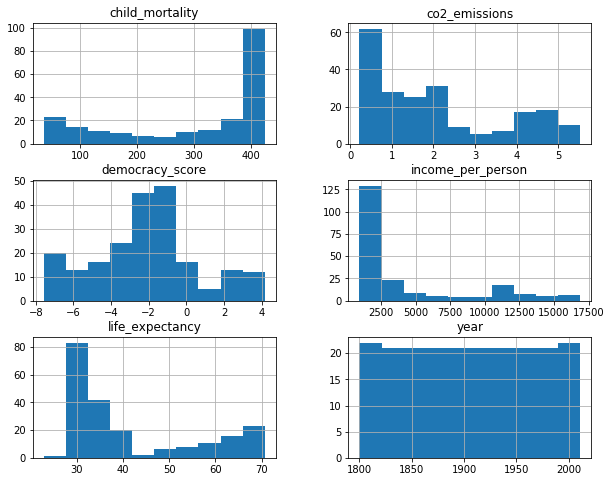

In [207]:
# Correlation between life expectancy and different metrics
gapminder_data.hist(figsize=(10,8));

We see that there is a high number of years that had high child mortality rates.  This is heavily skewed to the left meaning the mean is less than the median. This is negative skewness. 

For co2 emission, this is skewed to the right with a positive skew.  This mostly may be caused by historically not releasing as much co2 emissions and humanity is only starting to produce higher co2. 

Democracy score has a near bell curve skew but has a distribution that is more skewed to the left. Meaning, more countries have a negative democracy score than a positive democracy score. 

Income per person has a significant right skew.  For this, it actually reflects that there are still a significant number of humans who achieve very low amounts of imcome. 

Life expectancy has a positive skew as well meaning throughout the years there has been development in life_expectancy but there are so many more years when life expectancy was low. 

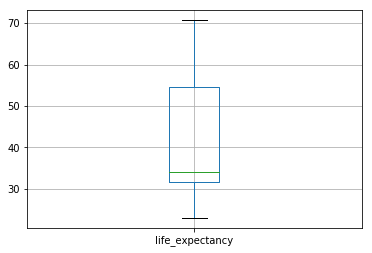

In [208]:
# box plots to view outliers
le_boxplot = gapminder_data.boxplot(column=['life_expectancy'])
le_boxplot

We see the mean for life expectancy to be on the lower end of the interquartile range for the box plot. 

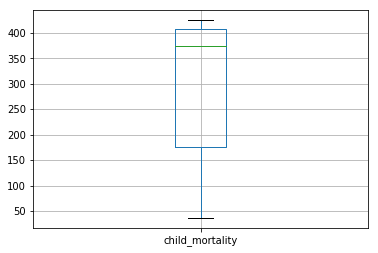

In [115]:
cm_boxplot = gapminder_data.boxplot(column=['child_mortality'])
cm_boxplot

We see the mean for child mortality to be much higher and a large portion of the data to have higher child  mortality rates

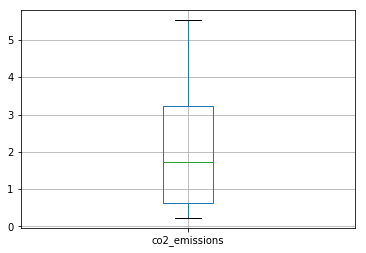

In [117]:
ce_boxplot = gapminder_data.boxplot(column=['co2_emissions'])
ce_boxplot

Overall there are much lower rates of co2 emissions

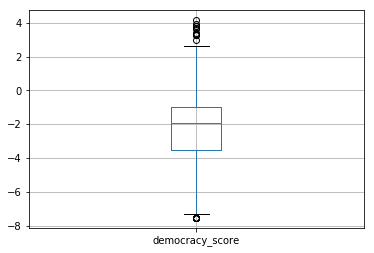

In [118]:
ds_boxplot = gapminder_data.boxplot(column=['democracy_score'])
ds_boxplot

There is a significant amount of outliers for democracy score.  This appears to have one significant on the lower end and a good amount on the higher end.  It shows that there are countries with these democracy scores that are creating these outliers. 

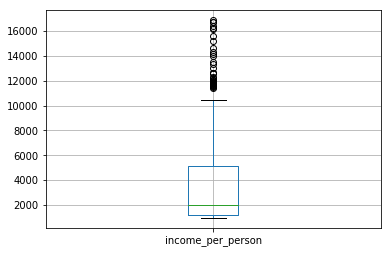

In [210]:
ipp_boxplot = gapminder_data.boxplot(column=['income_per_person'])
ipp_boxplot

There is a significant amount of outliers for income per person.  This illustrates that there is indeep large income gaps

### Research Question 2: Is there a correlations between the Dependent variable (life expectancy) and the independent variables?

In [211]:
# initial review of correlation
gapminder_data.corr()

,year,life_expectancy,income_per_person,democracy_score,co2_emissions,child_mortality
year,1.000000,0.881655,0.837240,0.771928,0.920086,-0.924462
life_expectancy,0.881655,1.000000,0.964183,0.531113,0.924070,-0.991230
income_per_person,0.837240,0.964183,1.000000,0.573788,0.903336,-0.950558
democracy_score,0.771928,0.531113,0.573788,1.000000,0.579905,-0.577505
co2_emissions,0.920086,0.924070,0.903336,0.579905,1.000000,-0.943038
child_mortality,-0.924462,-0.991230,-0.950558,-0.577505,-0.943038,1.000000


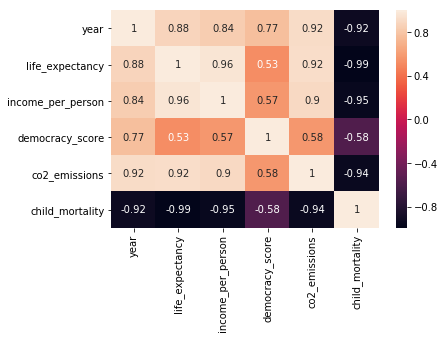

In [139]:
heat_map = sns.heatmap(gapminder_data.corr(), annot=True)

With a view of the data on a heatmap, we can see that life expectancy has a negative correlation with all the other variables including life expectancy. 

Life Expectancy has a positive correlation with year, income per person, democracy score, and co2 emissions. 

The strongest correlations with life expectancy in descending order are income per person, co2 emissions, year, and democracy score. This shows the powerful impact these independent variables do have on life expectancy. 

# Taking a look at the data over time

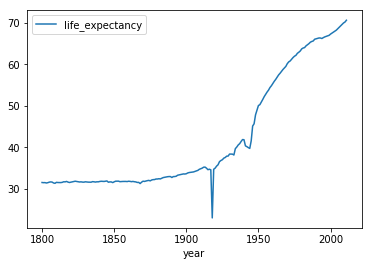

In [91]:
le_line = gapminder_data.plot.line(x='year', y ='life_expectancy')
le_line

We see a increase in life expectancy throughout the years with a sharp dip during the world wars. 

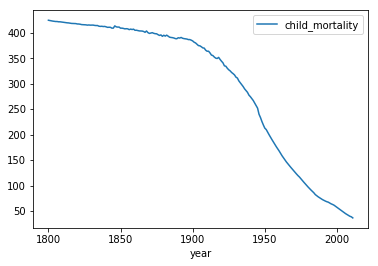

In [92]:
cm_line = gapminder_data.plot.line(x='year', y ='child_mortality')
cm_line

Child mortality has decreased throughout the years and had a much sharper decline in the 1900s

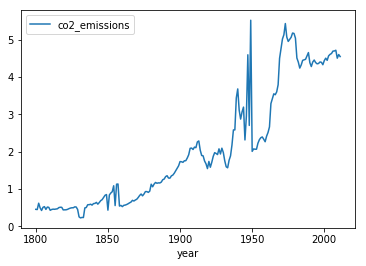

In [93]:
ce_line = gapminder_data.plot.line(x='year', y ='co2_emissions')
ce_line

Co2 Emissions have increased overtime and we see high development in the 1940s.  This could have been during the World War 2 era where gun power and weaponry were being developed.

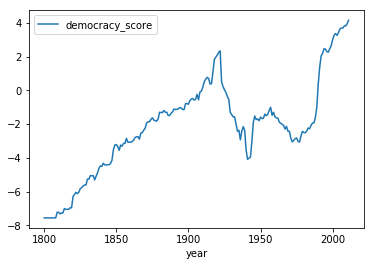

In [94]:
ds_line = gapminder_data.plot.line(x='year', y ='democracy_score')
ds_line

We see a sharp decline in democracy score after world war 1 and have remained low past world war 2. In the 1980s this was the time when decocracy started to have an increase again.

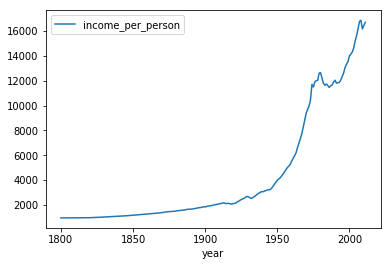

In [95]:
ipp_line = gapminder_data.plot.line(x='year', y ='income_per_person')
ipp_line

There is a sharp increase in income per person starting in the 1950s and I believe this is associated with the 1950s - 1970s industrial revolution

### Research Question 2: Closer review of the correlation

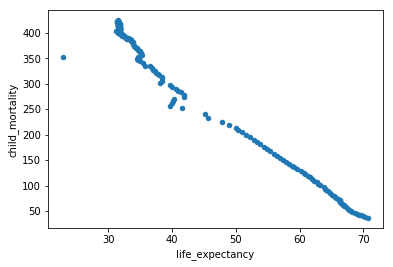

In [124]:
child_mortality_le = gapminder_data.plot.scatter(x='life_expectancy'
                                                ,y='child_mortality')

Clear negative correlation with child mortality and life expectancy

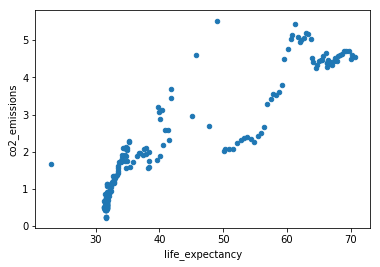

In [213]:
co2_emissions_le = gapminder_data.plot.scatter(x='life_expectancy'
                                                ,y='co2_emissions')

Positive correlation with co2 emissions and life expectancy

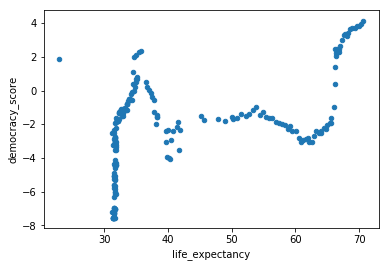

In [215]:
democracy_score_le = gapminder_data.plot.scatter(x='life_expectancy'
                                                ,y='democracy_score')

Slight neutral correlation but still positive correlation with democracy score and life expectancy

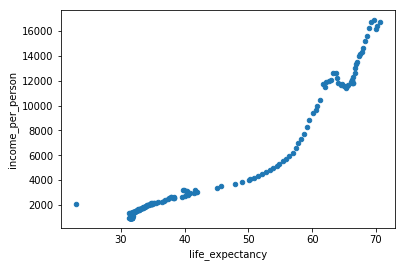

In [218]:
income_per_person_le = gapminder_data.plot.scatter(x='life_expectancy'
                                                ,y='income_per_person')

Positive correlation with income per person and life expectancy. 

<a id='conclusions'></a>
## Conclusions

> Overtime life expectancy is definitely improving!  We see the strongest correlation with income per person and life expectancy.  This means enabling more people with opportunities to have income will lead to them living longer. 

> We also see a strong correlation with co2 emissions which means that more technological developments that have advanced over the years have made human living easier and improved life expectancy.  This doesn't mean we should stick to co2 but then develop with alternative methods. 

> Democracy score also has a positive correlation but is close to neutral.  Meaning it may not have that much of an impact on life expectancy and is only slight correlated. 

> Child mortality has a negative correlation meaning that the lower the rate of children dying, the higher life expectancy will be which is expected. 


> It was great to do this analysis and see how significant moments in history have played an impact in advancing life expectancy.  I predict life expectancy will continue to increase as the data shows continuous increase. 



## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [220]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0